In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from PIL import Image
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython import display

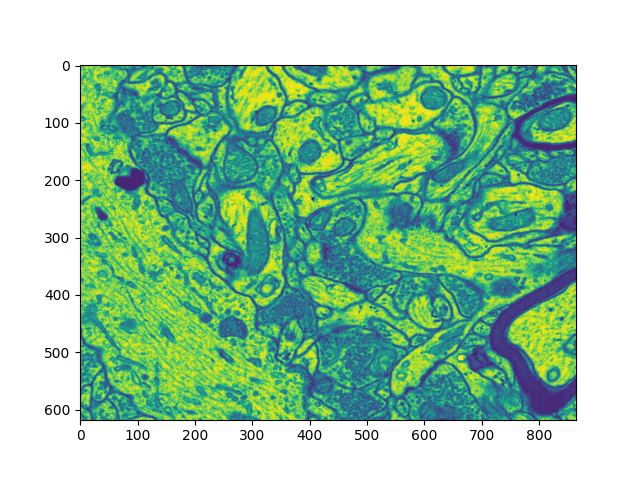

In [2]:
I = Image.open('output/0.png')
I = I.convert('L')
I_array = np.array(I)
I_array.shape
plt.figure()
plt.imshow(I_array)

In [3]:
I_stack = np.zeros([100, 100, 110])
for i in range(110):
    I = Image.open('output/'+str(i)+'.png')
    I = I.convert('L')
    I_array = np.array(I)
    I_crop = I_array[300:400, 0:100]
    I_stack[:,:,i] = I_crop

interactive(children=(IntSlider(value=0, description='i', max=109), Output()), _dom_classes=('widget-interact'…

<function __main__.updateFrames(i)>

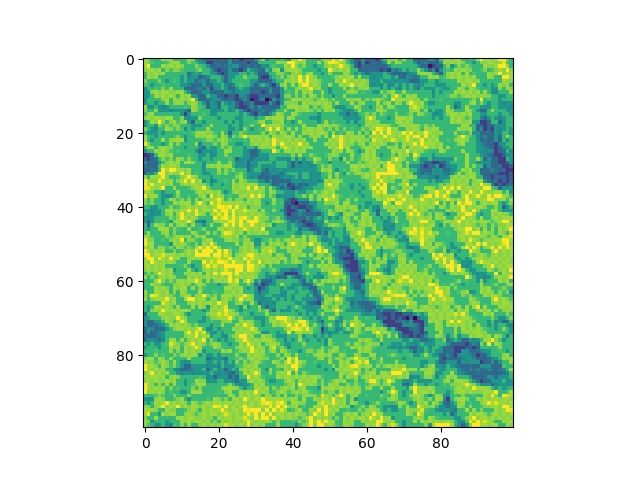

In [58]:
# Show forward
f, axes = plt.subplots(1, 1)
frames = []

def init():
    frames.append(axes.imshow(I_stack[:, :, 0]))

init()

def updateFrames(i):
    frames[0].set_data(I_stack[:, :, i])

interact(updateFrames, i=IntSlider(min=0, max=109, step=1, value=0))

In [66]:
I_modify = I_stack[:,:,41:81]

In [67]:
I_modify.shape

(100, 100, 40)

In [68]:
I_modify_array = I_modify/255/100 + 1.52

In [69]:
np.max(I_modify_array)

1.5298823529411765

In [70]:
np.min(I_modify_array)

1.52

In [71]:
np.save('tissue_152_153_100_z40.npy', I_modify_array)

In [40]:
I_modify_array_fft = np.fft.fftn(I_modify_array)

In [41]:
for i in range(100):
    for j in range(100):
        for z in range(25):
            if np.abs(I_modify_array_fft[i,j,z])>1000:
                I_modify_array_fft[i,j,z]=0

In [ ]:
# Show forward
f, axes = plt.subplots(1, 1)
frames = []

def init():
    frames.append(axes.imshow(I_stack[:, :, 0]))

init()

def updateFrames(i):
    frames[0].set_data(I_stack[:, :, i])

interact(updateFrames, i=IntSlider(min=0, max=109, step=1, value=0))